## Support vector machine classifier with ℓ2-regularization

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/pbharrin/machinelearninginaction/master/Ch06/testSet.txt", delimiter='\t', names=['x', 'y', 'label'])
data.head()

,x,y,label
0,3.542485,1.977398,-1
1,3.018896,2.556416,-1
2,7.551510,-1.580030,1
3,2.114999,-0.004466,-1
4,8.127113,1.274372,1


In [157]:
X = data[['x', 'y']].values
Y = data[['label']].values.astype('float64')

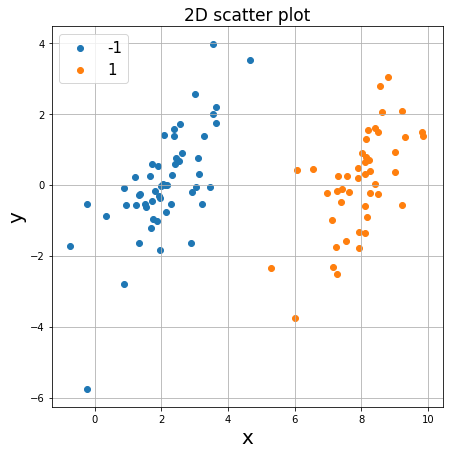

In [4]:
fig, ax = plt.subplots(figsize=(7, 7))

for label in data['label'].unique().tolist():
    if label == 1:
        ax.scatter(data[data['label'] == label]['x'], data[data['label'] == label]['y'], label=label)        
    else :
        ax.scatter(data[data['label'] == label]['x'], data[data['label'] == label]['y'], label=label)       

ax.set_title('2D scatter plot', fontsize=17)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.legend(fontsize=15)
ax.grid(True)
plt.show()

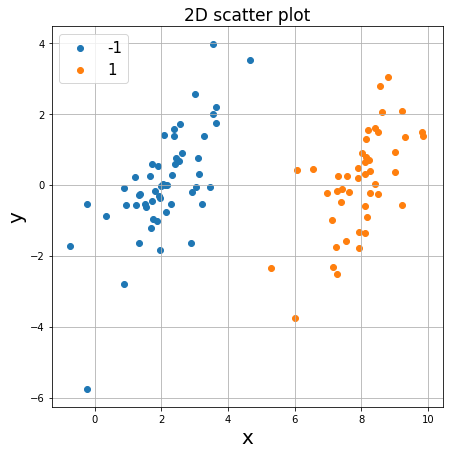

In [153]:
fig, ax = plt.subplots(figsize=(7, 7))

for label in data['label'].unique().tolist():
    if label == 1:
        ax.scatter(data[data['label'] == label]['x'], data[data['label'] == label]['y'], label=label)        
    else :
        ax.scatter(data[data['label'] == label]['x'], data[data['label'] == label]['y'], label=label)       


ax.set_title('2D scatter plot', fontsize=17)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.legend(fontsize=15)
ax.grid(True)
plt.show()

## Scikit-Learn의 서포트 벡터 머신 (검증용)

C:\Users\LHJ\study\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


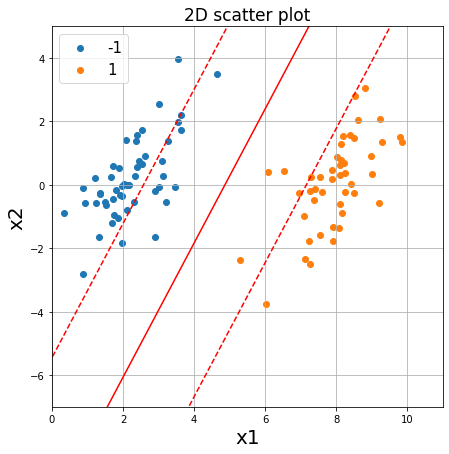

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# iteration = 1000 
clf = svm.LinearSVC(penalty='l2', C=1)
clf.fit(X, Y)

fig, ax = plt.subplots(figsize=(7, 7))

for label in data['label'].unique().tolist():
    if label == 1:
        ax.scatter(data[data['label'] == label]['x'], data[data['label'] == label]['y'], label=label)        
    else :
        ax.scatter(data[data['label'] == label]['x'], data[data['label'] == label]['y'], label=label)       

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2,12)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
ax.plot(xx, yy, 'k-',  color='red')
ax.plot(xx, yy_down, 'k--', color='red')
ax.plot(xx, yy_up, 'k--',  color='red')

x_min = -4.8
x_max = 4.2
y_min = -6
y_max = 6

ax.set_xlim(0, 11)
ax.set_ylim(-7, 5)

ax.set_title('2D scatter plot', fontsize=17)
ax.set_xlabel('x1', fontsize=20)
ax.set_ylabel('x2', fontsize=20)
ax.legend(fontsize=15)
ax.grid(True)
plt.show()

### CVXPY 로 SVM 분류하기(ADMM)

In [172]:
# Form SVM with L1 regularization problem.

import cvxpy as cp

n = 2
m = 100

beta = cp.Variable((n,1))
v = cp.Variable()
loss = cp.sum(cp.pos(1 - cp.multiply(Y, X @ beta - v)))
reg = cp.norm(beta, 2)
lambd = cp.Parameter(nonneg=True)
prob = cp.Problem(cp.Minimize(loss/m + lambd*reg))

In [173]:
prob.solve()

ParameterError: Problem contains unspecified parameters.